# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

In [3]:
# First 5 values of the dataframe
df_tesla.head() 

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [4]:
df_tesla.shape # Shape of dataframe (including number of rows and columns)

(124, 3)

In [5]:
df_tesla.columns # list of column names

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [6]:
# Largest and smallest value for tesla in web search
largest_web_search = df_tesla['TSLA_WEB_SEARCH'].max()
smallest_web_search = df_tesla['TSLA_WEB_SEARCH'].min()
print(f'Largest value for Tesla in Web Search: {largest_web_search}')
print(f'Smallest value for Tesla in Web Search: {smallest_web_search}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [7]:
df_tesla.describe() # useful statistics

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [8]:
# Periodicity of the data (time series) = Month
# Value of 100 in the Google Trend search popularity means its extremely popular

### Unemployment Data

In [9]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [10]:
df_unemployment.shape

(181, 3)

In [11]:
largest_unemployment_benefit = df_unemployment['UE_BENEFITS_WEB_SEARCH'].max()
print(f'Largest value for "Unemployment Benefits" in Web Search: {largest_unemployment_benefit}')

Largest value for "Unemployment Benefits" in Web Search: 100


In [12]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [ ]:
# Periodicity = Month

### Bitcoin

In [13]:
df_btc_search.shape

(73, 2)

In [14]:
df_btc_price.shape

(2204, 3)

In [15]:
df_btc_search.columns

Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

In [16]:
df_btc_price.columns

Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')

In [17]:
largest_btc_search = df_btc_search['BTC_NEWS_SEARCH'].max()
print(f'largest BTC News Search: {largest_btc_search}')

largest BTC News Search: 100


In [18]:
df_btc_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [19]:
df_btc_price.describe()

,CLOSE,VOLUME
count,2203.000000,2.203000e+03
mean,4429.421245,8.043622e+09
std,4148.150071,1.176529e+10
min,178.102997,5.914570e+06
25%,433.629502,6.029915e+07
50%,3637.520020,2.018890e+09
75%,7997.372803,1.322478e+10
max,19497.400391,7.415677e+10


# Data Cleaning

### Check for Missing Values

In [20]:
# Check for missing values in each dataframe
print(f'Missing values for Tesla?: {df_tesla.isna().any().sum()}')
print(f'Missing values for U/E?: {df_unemployment.isna().any().sum()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().any().sum()}')
print(f'Missing values for BTC price?: {df_btc_price.isna().any().sum()}') # i've deleted it earlier

Missing values for Tesla?: 0
Missing values for U/E?: 0
Missing values for BTC Search?: 0
Missing values for BTC price?: 2


In [21]:
# Count total number of missing values
missing_tesla = df_tesla.isna().any().sum()
missing_ue = df_unemployment.isna().any().sum()
missing_btc_search = df_btc_search.isna().any().sum()
missing_btc_price = df_btc_price.isna().any().sum() 
print(f'Number of missing values: {missing_tesla+missing_ue+missing_btc_search+missing_btc_price}')

Number of missing values: 2


In [22]:
# Remove any empty values
df_btc_price = df_btc_price.dropna()
df_btc_price.isna().any().sum()

0

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [23]:
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])
df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'])
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])

In [24]:
type(df_btc_price['DATE'][0])==type(df_btc_search['MONTH'][0])==type(df_unemployment['MONTH'][0])==type(df_tesla['MONTH'][0])

True

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [25]:
df_btc_price.resample('M', on='DATE') # resampling daily data into monthly data
df_btc_price['DATE']

0      2014-09-17
1      2014-09-18
2      2014-09-19
3      2014-09-20
4      2014-09-21
          ...    
2199   2020-09-24
2200   2020-09-25
2201   2020-09-26
2202   2020-09-27
2203   2020-09-28
Name: DATE, Length: 2203, dtype: datetime64[ns]

In [26]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()
df_btc_monthly.shape

(73, 3)

In [27]:
df_btc_monthly

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,3.470730e+07
2014-10-31,2014-10-31,338.321014,1.254540e+07
2014-11-30,2014-11-30,378.046997,9.194440e+06
2014-12-31,2014-12-31,320.192993,1.394290e+07
2015-01-31,2015-01-31,217.464005,2.334820e+07
...,...,...,...
2020-05-31,2020-05-31,9461.058594,2.777329e+10
2020-06-30,2020-06-30,9137.993164,1.573580e+10
2020-07-31,2020-07-31,11323.466797,2.316047e+10


# Data Visualisation

### Notebook Formatting & Style Helpers

In [28]:
# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [29]:
# Create locators for ticks on the time axis
year = mdate.YearLocator()
month = mdate.MonthLocator()
years_fmt = mdate.DateFormatter('%Y')

### Tesla Stock Price v.s. Search Volume

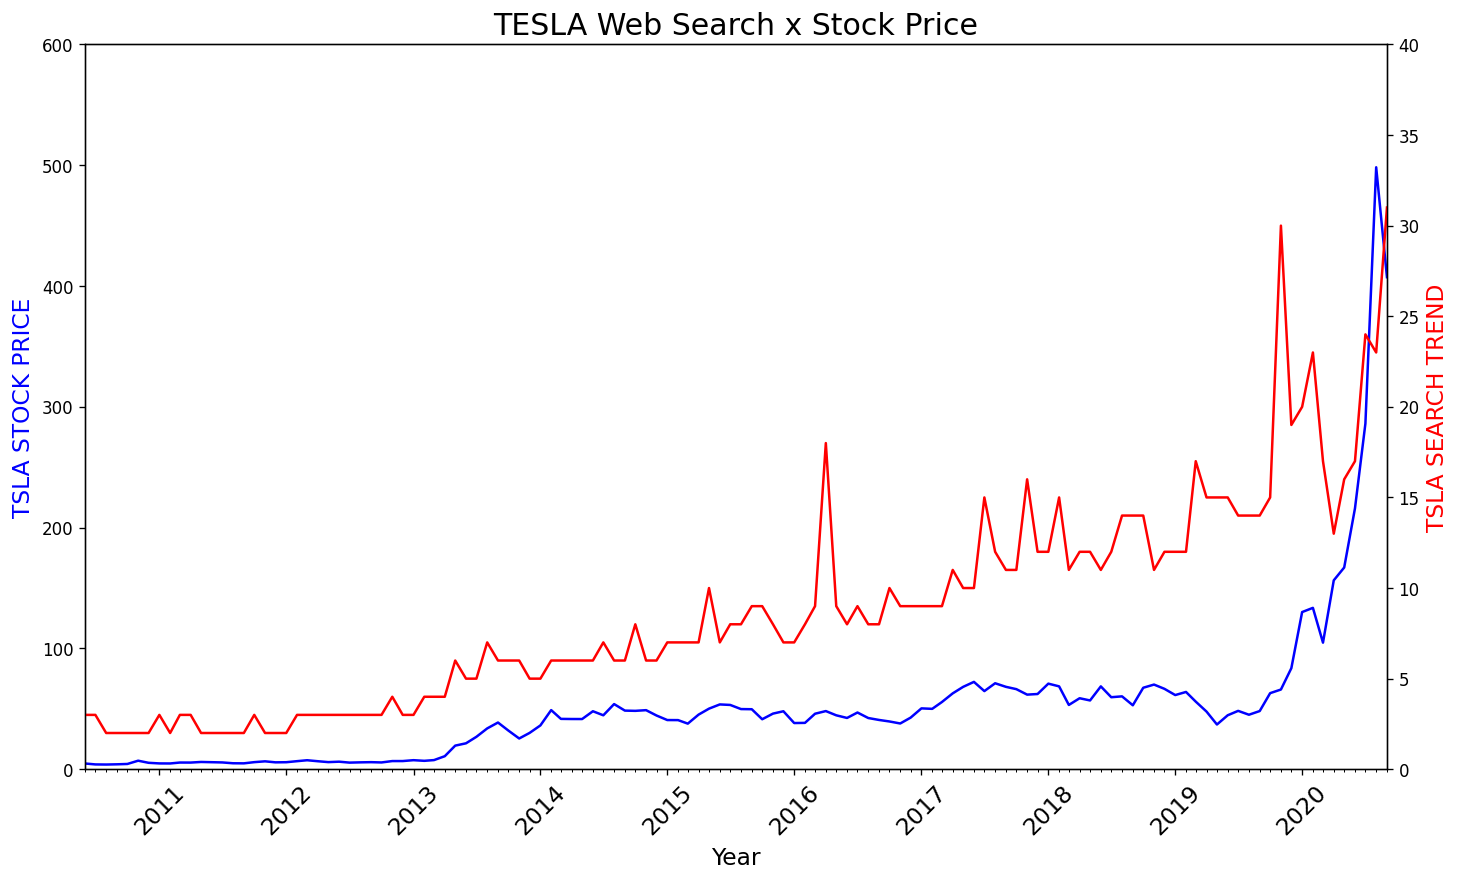

In [30]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('TESLA Web Search x Stock Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

# Setup axis
axis_stock = plt.gca()
axis_search = axis_stock.twinx()

# Setup labels
axis_search.set_ylabel('TSLA SEARCH TREND', color='red', fontsize=14)
axis_stock.set_ylabel('TSLA STOCK PRICE', color='blue', fontsize=14)
axis_stock.set_xlabel('Year',fontsize=14)

# Set limits
axis_stock.set_ylim([0,600])
axis_search.set_ylim([0,40])
axis_stock.set_xlim([df_tesla['MONTH'].min(), df_tesla['MONTH'].max()])

axis_stock.xaxis.set_major_locator(year)
axis_stock.xaxis.set_major_formatter(years_fmt)
axis_stock.xaxis.set_minor_locator(month)

# Set plots
axis_stock.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='blue')
axis_search.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], color='red')

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

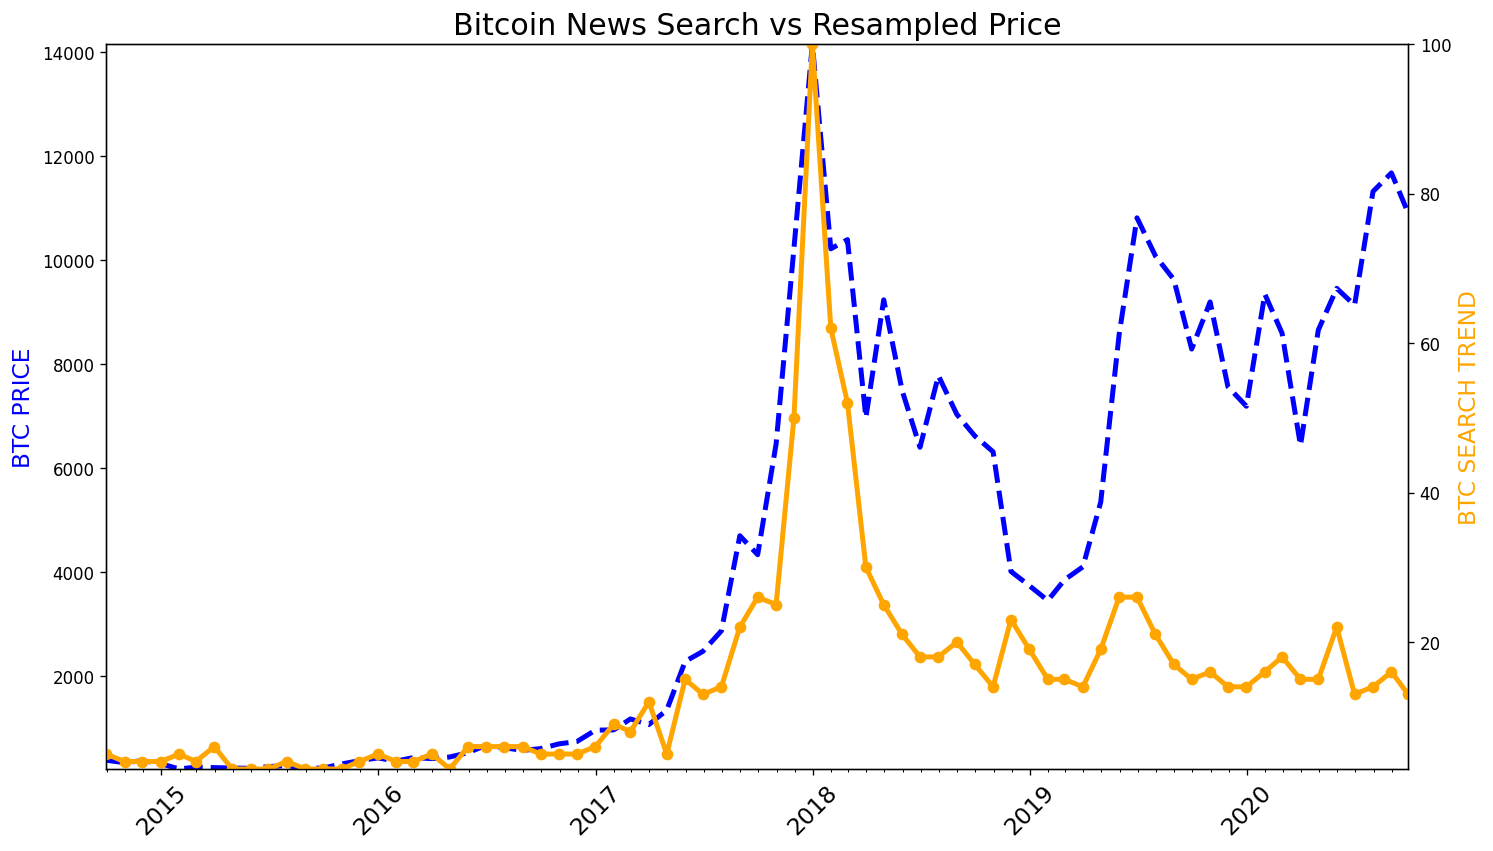

In [31]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

# Setup axis
axis_btc_stock = plt.gca()
axis_btc_search = axis_btc_stock.twinx()

# Setup labels
axis_btc_search.set_ylabel('BTC SEARCH TREND', color='orange', fontsize=14)
axis_btc_stock.set_ylabel('BTC PRICE', color='blue', fontsize=14)

# Set limits
axis_btc_stock.set_ylim([df_btc_monthly['CLOSE'].min(), df_btc_monthly['CLOSE'].max()])
axis_btc_search.set_ylim([df_btc_search['BTC_NEWS_SEARCH'].min(), df_btc_search['BTC_NEWS_SEARCH'].max()])
axis_btc_stock.set_xlim([df_btc_monthly['DATE'].min(), df_btc_monthly['DATE'].max()])

axis_btc_stock.xaxis.set_major_locator(year)
axis_btc_stock.xaxis.set_major_formatter(years_fmt)
axis_btc_stock.xaxis.set_minor_locator(month)

# Set plots
axis_btc_stock.plot(df_btc_monthly['DATE'], df_btc_monthly['CLOSE'], color='blue', linestyle='dashed', linewidth=3)
axis_btc_search.plot(df_btc_monthly['DATE'], df_btc_search['BTC_NEWS_SEARCH'], color='orange', marker='o', linewidth=3)

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

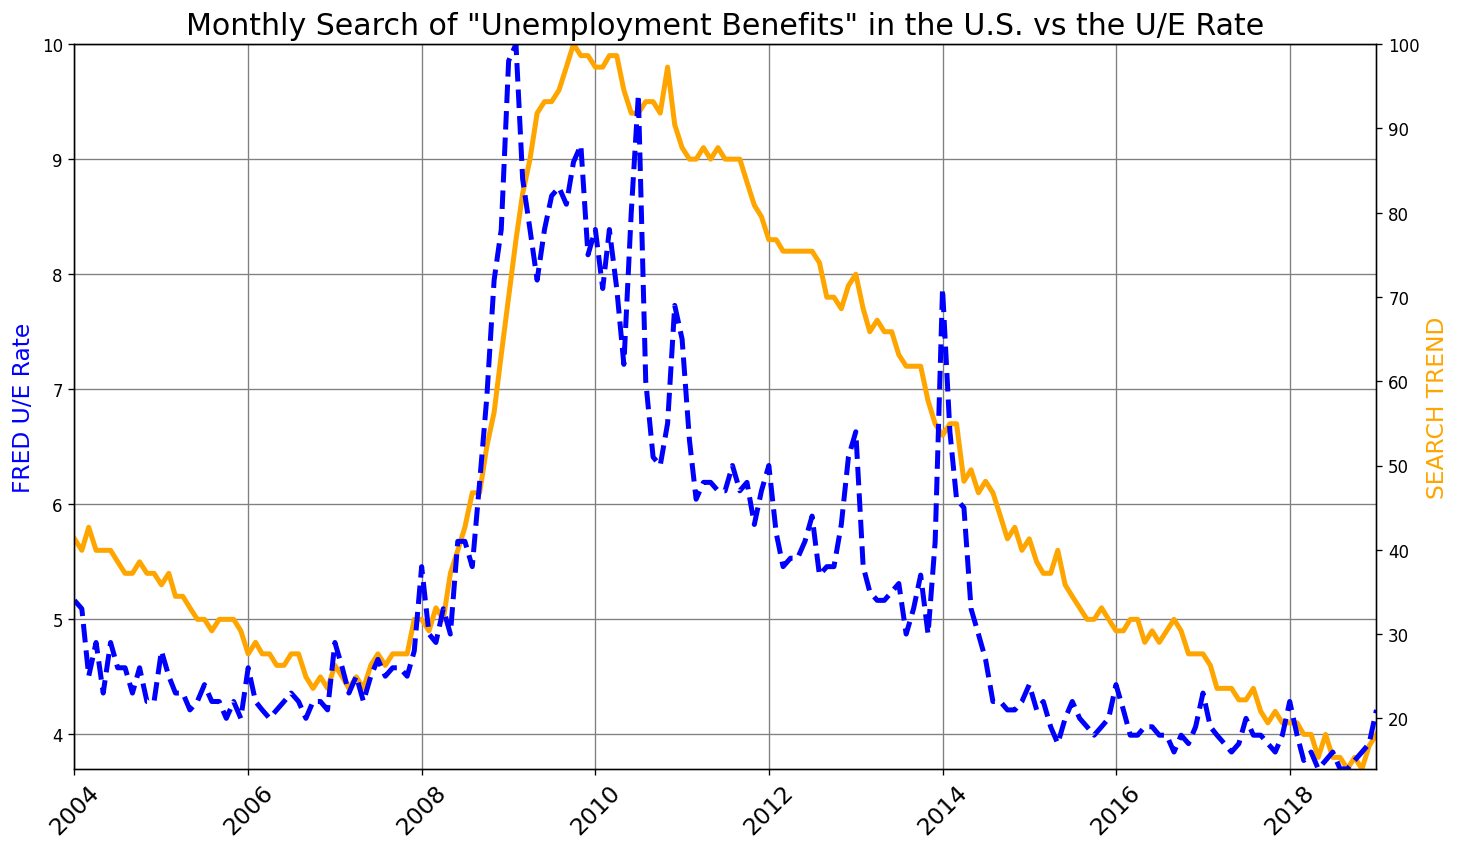

In [38]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

# Setup axis
axis_ue_rate = plt.gca()
axis_ue_search = axis_ue_rate.twinx()

# Setup labels
axis_ue_search.set_ylabel('SEARCH TREND', color='orange', fontsize=14)
axis_ue_rate.set_ylabel('FRED U/E Rate', color='blue', fontsize=14)

# Set limits
axis_ue_rate.set_ylim([df_unemployment['UNRATE'].min(), df_unemployment['UNRATE'].max()])
axis_ue_search.set_ylim([df_unemployment['UE_BENEFITS_WEB_SEARCH'].min(), df_unemployment['UE_BENEFITS_WEB_SEARCH'].max()])
axis_ue_rate.set_xlim([df_unemployment['MONTH'].min(), df_unemployment['MONTH'].max()])

axis_btc_stock.xaxis.set_major_locator(year)
axis_btc_stock.xaxis.set_major_formatter(years_fmt)
axis_btc_stock.xaxis.set_minor_locator(month)

# Set plots
axis_ue_rate.plot(df_unemployment['MONTH'], df_unemployment['UNRATE'], color='orange', linewidth=3)
axis_ue_search.plot(df_unemployment['MONTH'], df_unemployment['UE_BENEFITS_WEB_SEARCH'], color='blue', linestyle='dashed', linewidth=3)


# Set Grid
axis_ue_rate.grid(axis='both',color='grey')
plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


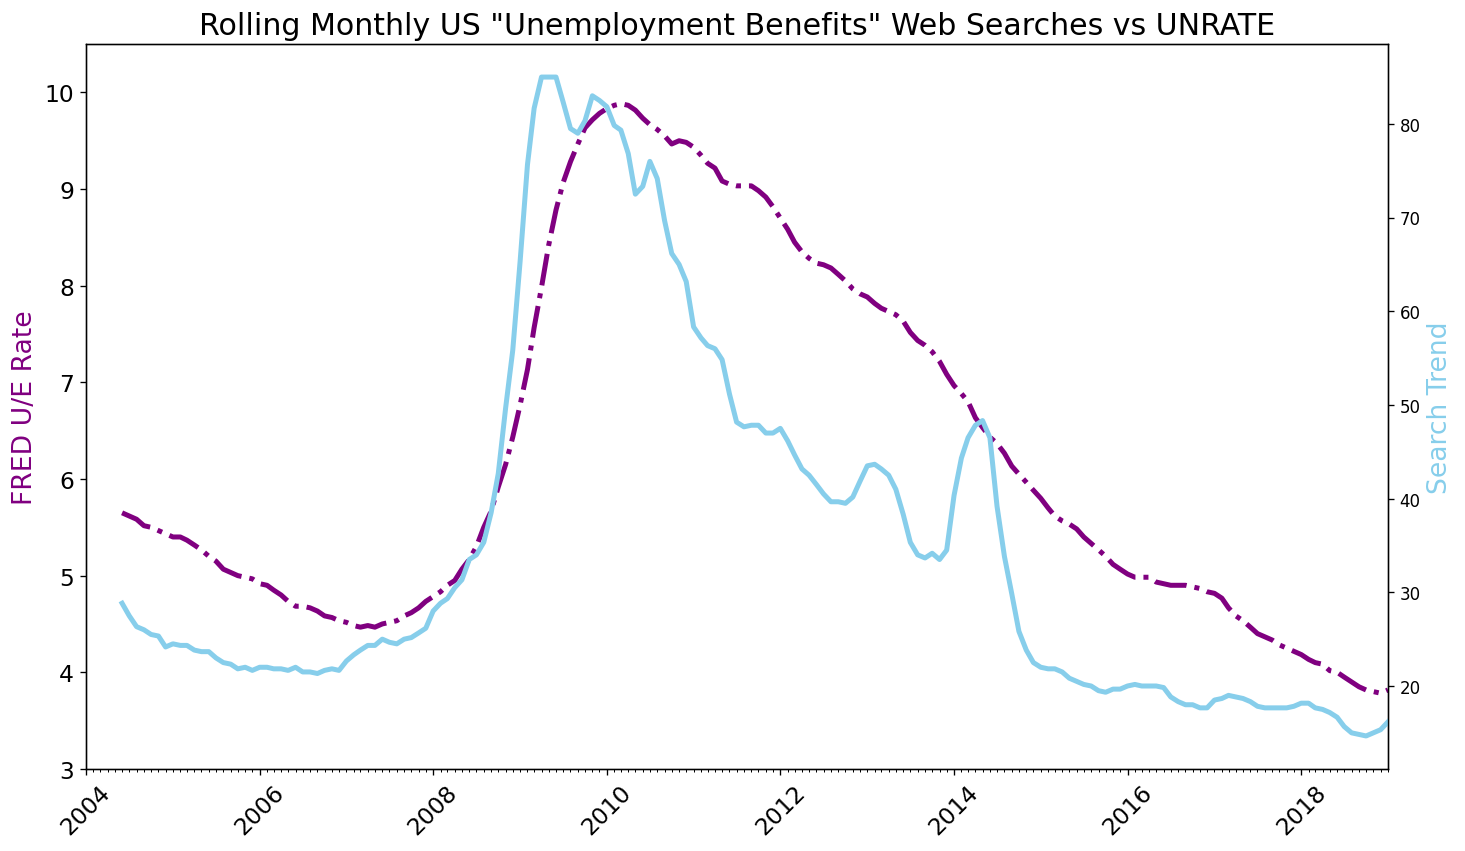

In [40]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(month)
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)
 
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH[0], df_unemployment.MONTH.max()])
 
# Calculate the rolling average over a 6 month window
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
 
ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, 'purple', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)
 
plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [41]:
df_unemployment2 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_unemployment2['MONTH'] = pd.to_datetime(df_unemployment2['MONTH'])
df_unemployment2.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,9,5.7
1,2004-02-01,8,5.6
2,2004-03-01,7,5.8
3,2004-04-01,8,5.6
4,2004-05-01,6,5.6


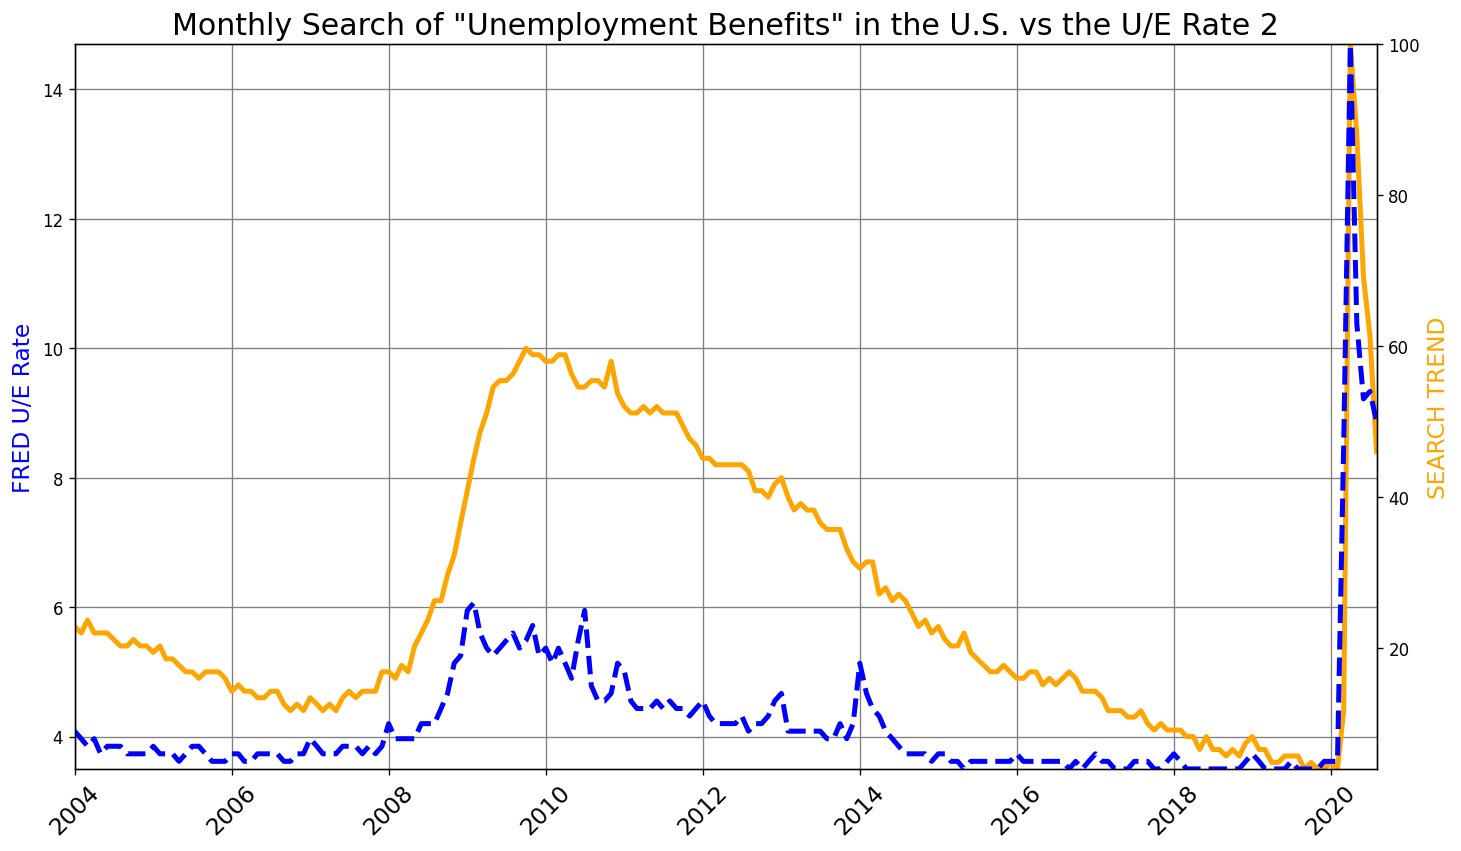

In [42]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate 2', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

# Setup axis
axis_ue_rate = plt.gca()
axis_ue_search = axis_ue_rate.twinx()

# Setup labels
axis_ue_search.set_ylabel('SEARCH TREND', color='orange', fontsize=14)
axis_ue_rate.set_ylabel('FRED U/E Rate', color='blue', fontsize=14)

# Set limits
axis_ue_rate.set_ylim([df_unemployment2['UNRATE'].min(), df_unemployment2['UNRATE'].max()])
axis_ue_search.set_ylim([df_unemployment2['UE_BENEFITS_WEB_SEARCH'].min(), df_unemployment2['UE_BENEFITS_WEB_SEARCH'].max()])
axis_ue_rate.set_xlim([df_unemployment2['MONTH'].min(), df_unemployment2['MONTH'].max()])

axis_btc_stock.xaxis.set_major_locator(year)
axis_btc_stock.xaxis.set_major_formatter(years_fmt)
axis_btc_stock.xaxis.set_minor_locator(month)

# Set plots
axis_ue_rate.plot(df_unemployment2['MONTH'], df_unemployment2['UNRATE'], color='orange', linewidth=3)
axis_ue_search.plot(df_unemployment2['MONTH'], df_unemployment2['UE_BENEFITS_WEB_SEARCH'], color='blue', linestyle='dashed', linewidth=3)


# Set Grid
axis_ue_rate.grid(axis='both',color='grey')
plt.show()